In [30]:
import yfinance as yf #yahoo finance API
import matplotlib.pyplot as plt 
import pandas as pd 

sp500=yf.Ticker('^GSPC') #S&P 500 index ticker

sp500=sp500.history(period='max') #get historical data for S&P 500

sp500



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-23 00:00:00-04:00,6326.899902,6360.640137,6317.490234,6358.910156,5642510000,0.0,0.0
2025-07-24 00:00:00-04:00,6368.600098,6381.310059,6360.569824,6363.350098,5282720000,0.0,0.0
2025-07-25 00:00:00-04:00,6370.009766,6395.819824,6368.529785,6388.640137,4470720000,0.0,0.0


<Axes: xlabel='Date'>

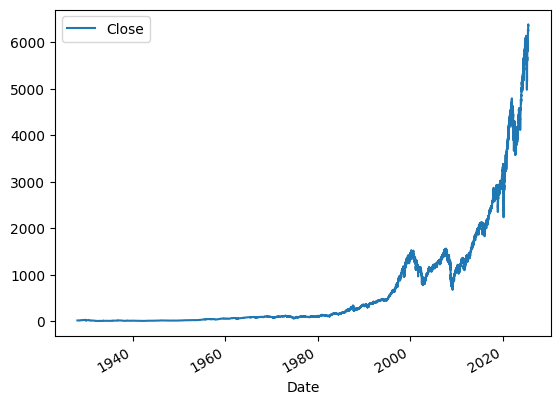

In [31]:
sp500.plot.line(y='Close', use_index=True)

In [32]:
# clean data

sp500 = sp500.drop(columns=['Dividends', 'Stock Splits']) # unnecessary columns

# create new columns for tomorrow's close and target variable
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500 = sp500.loc["1990-01-01":]  # filter data to start from 1990
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-07-23 00:00:00-04:00,6326.899902,6360.640137,6317.490234,6358.910156,5642510000,6363.350098,1
2025-07-24 00:00:00-04:00,6368.600098,6381.310059,6360.569824,6363.350098,5282720000,6388.640137,1
2025-07-25 00:00:00-04:00,6370.009766,6395.819824,6368.529785,6388.640137,4470720000,6389.770020,1


In [33]:
sp500.to_csv('sp500_data.csv')  # save to CSV file